In [46]:
from bs4 import BeautifulSoup
import html5lib
import pandas as pd
import fnmatch

myFile=open("TR Sparpläne.html",'r')
soup=BeautifulSoup(myFile,"html5lib")
price = soup.findAll(
            "span",
            {"class": "savingsPlanItem__amount"})
    
name = soup.findAll(
           "p",
           {"class": "savingsPlanItem__name"})

day = soup.findAll(
           "span",
           {"class": "tag"})

aktien = []
preise = []
tage = []

for tag in day:
    l = (str(tag).split("<"))
    m = l[1].split(">")
    tage.append(m[1])

for names in name:
    l = str(names).split(">")
    m = l[1].split("</")
    f = m[0]
    aktien.append(f)

sum = 0
for e in price:
    l = str(e).split(">")
    l2 = l[1].split("\xa0€</span")
    preis = l2[0]
    sum += int(preis)
    preise.append(int(preis))
    
    
zipped = list(zip(aktien, preise, tage))
df = pd.DataFrame(zipped, columns=['Aktienname', 'Sparplanbetrag', 'Intervall'])
 
df.loc[
(df.Aktienname.str.contains("Sea")) |
(df.Aktienname.str.contains("Hubspot"))| (df.Aktienname.str.contains("Monster")) | (df.Aktienname.str.contains("Salesforce"))| (df.Aktienname.str.contains("Block"))| (df.Aktienname.str.contains("Mongo"))| (df.Aktienname.str.contains("Adobe"))| (df.Aktienname.str.contains("Netflix"))| (df.Aktienname.str.contains("Alphabet"))| (df.Aktienname.str.contains("Amazon"))| (df.Aktienname.str.contains("Meta"))| (df.Aktienname.str.contains("Coinbase"))| (df.Aktienname.str.contains("secunet"))| (df.Aktienname.str.contains("Mercado"))| (df.Aktienname.str.contains("ABOUT YOU"))| (df.Aktienname.str.contains("BioNTech"))| (df.Aktienname.str.contains("Datadog"))| (df.Aktienname.str.contains("NVIDIA"))| (df.Aktienname.str.contains("HelloFresh"))| (df.Aktienname.str.contains("Airbnb"))| (df.Aktienname.str.contains("Shopify"))| (df.Aktienname.str.contains("Ziprecruiter"))| (df.Aktienname.str.contains("Intuitive Surgical")), "Branche"] = "Wachstum"

df.loc[
(df.Aktienname.str.contains("Accenture")) |
(df.Aktienname.str.contains("Cola")) | (df.Aktienname.str.contains("Altria"))| (df.Aktienname.str.contains("Kering"))| (df.Aktienname.str.contains("Starbucks"))| (df.Aktienname.str.contains("LVMH"))| (df.Aktienname.str.contains("McDonald"))| (df.Aktienname.str.contains("Deere"))| (df.Aktienname.str.contains("Procter"))| (df.Aktienname.str.contains("Ferrari"))| (df.Aktienname.str.contains("Novo Nor"))| (df.Aktienname.str.contains("Nestl"))| (df.Aktienname.str.contains("Unilever"))| (df.Aktienname.str.contains("Pepsi")), "Branche"] = "Value Aktie"

df.loc[
(df.Aktienname.str.contains("Core S&amp;P 500")) |
(df.Aktienname.str.contains("Core MSCI World")) | (df.Aktienname.str.contains("Digital Security")), "Branche"] = "Basic Investment" 

df["Monatlicher Betrag"] = df["Sparplanbetrag"] * df["Intervall"].apply(lambda x: 2 if x == "Zweimal im Monat" else 1)

df["Prozentualer_Anteil"] = df["Monatlicher Betrag"] / df["Monatlicher Betrag"].sum() * 100 

print("Monatlicher Sparplanbetrag: " + str(df["Monatlicher Betrag"].sum()) + "€")
df

Monatlicher Sparplanbetrag: 1692€


,Aktienname,Sparplanbetrag,Intervall,Branche,Monatlicher Betrag,Prozentualer_Anteil
0,Hubspot,10,Zweimal im Monat,Wachstum,20,1.182033
1,Core S&amp;P 500 USD (Acc),105,Zweimal im Monat,Basic Investment,210,12.411348
2,Core MSCI World USD (Acc),150,Zweimal im Monat,Basic Investment,300,17.730496
3,Digital Security USD (Acc),105,Zweimal im Monat,Basic Investment,210,12.411348
4,Intuitive Surgical,10,Zweimal im Monat,Wachstum,20,1.182033
5,Accenture,10,Zweimal im Monat,Value Aktie,20,1.182033
6,Salesforce,20,Zweimal im Monat,Wachstum,40,2.364066
7,Block,10,Zweimal im Monat,Wachstum,20,1.182033
8,Coca-Cola,20,Zweimal im Monat,Value Aktie,40,2.364066
9,MongoDB A,10,Zweimal im Monat,Wachstum,20,1.182033


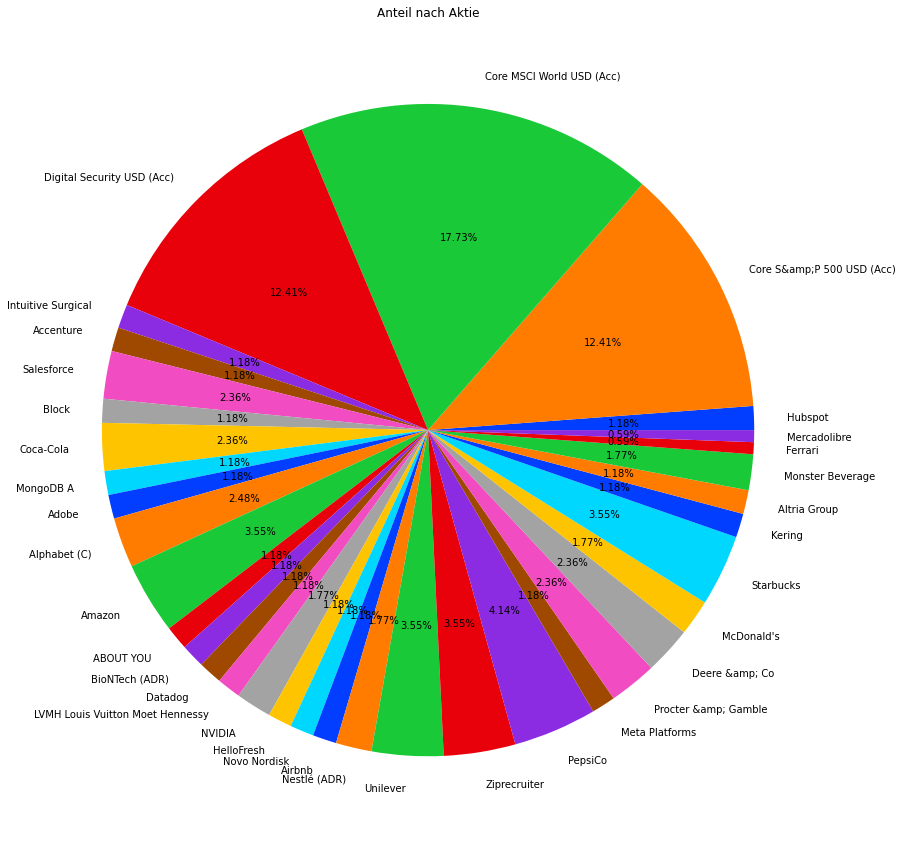

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=15,15
colors = sns.color_palette('bright')
plt.pie(df["Monatlicher Betrag"], labels = df.Aktienname, colors = colors, autopct='%.2f%%')
plt.title("Anteil nach Aktie")
plt.show()


810 1004 1440


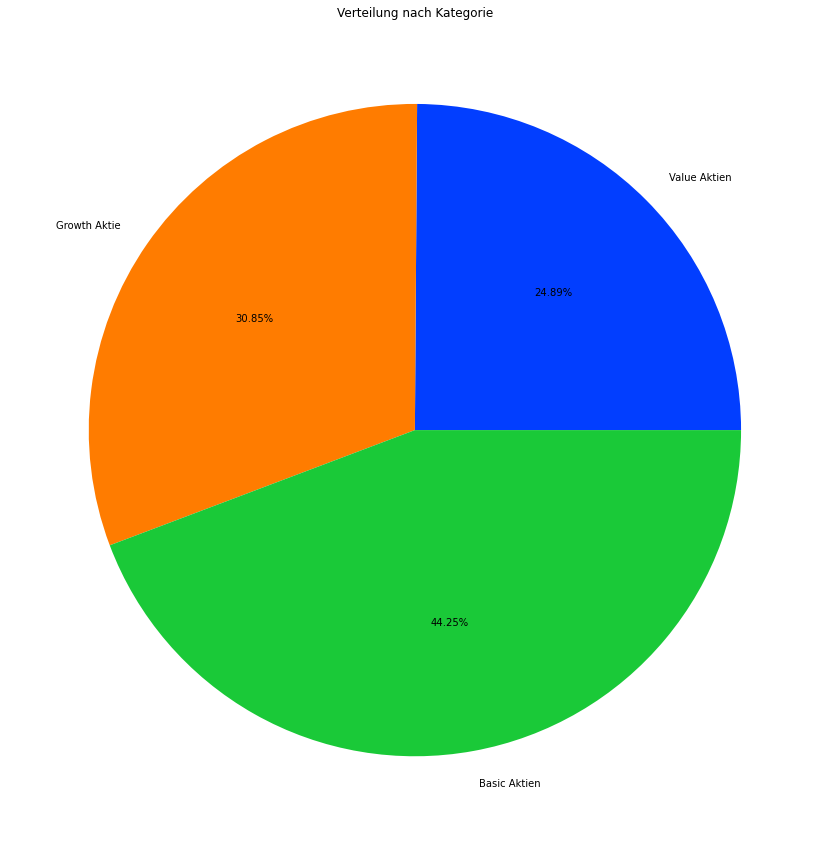

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



summe_value_aktien = np.sum(df["Monatlicher Betrag"][(df.Branche == "Value Aktie")])
summe_growth_aktien = np.sum(df["Monatlicher Betrag"][(df.Branche == "Wachstum")])
summe_basic_aktien = np.sum(df["Monatlicher Betrag"][(df.Branche == "Basic Investment")])


total = summe_value_aktien + summe_growth_aktien + summe_basic_aktien

print(summe_value_aktien*2, summe_growth_aktien*2, summe_basic_aktien*2)

vals = [(summe_value_aktien / total * 100) , (summe_growth_aktien / total * 100), (summe_basic_aktien / total * 100)]
labels = ["Value Aktien", "Growth Aktie", "Basic Aktien"]

plt.rcParams["figure.figsize"]=15,15
colors = sns.color_palette('bright')
plt.pie(vals, labels = labels, colors = colors, autopct='%.2f%%')
plt.title("Verteilung nach Kategorie")
plt.show()